In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
twitter_df = pd.read_pickle(r"C:\Users\stokg\Downloads\gender_full_dataset_with_m3_bert_Apr22.pkl")
labels=pd.read_pickle(r"C:\Users\stokg\Downloads\kmeans_ncluster=3 (2).pkl")
twitter_df['label_K3']=labels
twitter_df.columns

Index(['author_id', 'id', 'retweet_count', 'reply_count', 'like_count',
       'quote_count', 'text', 'source', 'referenced_tweets', 'created_at',
       'lang', 'place_id', 'cleaned text', 'tokens', 'place_name',
       'user_created_at', 'user_description', 'user_entities', 'user_id',
       'user_location', 'user_name', 'user_pinned_tweet_id',
       'user_profile_image_url', 'user_protected', 'user_followers_count',
       'user_following_count', 'user_tweet_count', 'user_listed_count',
       'user_url', 'user_username', 'user_verified', 'user_withheld', 'gender',
       'age', 'org', 'Bert_embedding', 'Bert_cluster_kmeans', 'label_K3'],
      dtype='object')

In [6]:
twitter_df.groupby(['Bert_cluster_kmeans']).size()

np.unique(twitter_df['Bert_cluster_kmeans'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [20]:
for i in range(len(np.unique(twitter_df['label_K3']))):
    cond1=twitter_df["label_K3"]==i
    a1=twitter_df["age"]=='>=40'
    a2=twitter_df["age"]=='30-39'
    a3=twitter_df["age"]=='19-29'
    a4=twitter_df["age"]=='<=18'
    a5=twitter_df["age"].isnull()
    g1=twitter_df["gender"]=='male'
    g2=twitter_df["gender"]=='female'
    g3=twitter_df["gender"].isnull()
    o1=twitter_df["org"]=='non-org'
    o2=twitter_df["org"]=='is-org'
    o3=twitter_df["org"].isnull()
    print(f"Age information for cluster {i+1}")
    print(f"% Age 40+: {round(len(twitter_df[cond1&a1])/len(twitter_df[cond1]),2)}")
    print(f"% Age 30-39: {round(len(twitter_df[cond1&a2])/len(twitter_df[cond1]),2)}")
    print(f"% Age 19-29: {round(len(twitter_df[cond1&a3])/len(twitter_df[cond1]),2)}")
    print(f"% Age <=18: {round(len(twitter_df[cond1&a4])/len(twitter_df[cond1]),2)}")
    print(f"% Age unknown: {round(len(twitter_df[cond1&a5])/len(twitter_df[cond1]),2)}")
    print(f"Gender information for cluster {i+1}")
    print(f"% Male: {round(len(twitter_df[cond1&g1])/len(twitter_df[cond1]),2)}")
    print(f"% Female: {round(len(twitter_df[cond1&g2])/len(twitter_df[cond1]),2)}")
    print(f"% Unknown: {round(len(twitter_df[cond1&g3])/len(twitter_df[cond1]),2)}")
    print(f"Org. information for cluster {i+1}")
    print(f"% Org: {round(len(twitter_df[cond1&o2])/len(twitter_df[cond1]),2)}")
    print(f"% Not Org: {round(len(twitter_df[cond1&o1])/len(twitter_df[cond1]),2)}")
    print(f"% Unknown: {round(len(twitter_df[cond1&o3])/len(twitter_df[cond1]),2)}")
    print("------------------")
    

Age information for cluster 1
% Age 40+: 0.29
% Age 30-39: 0.18
% Age 19-29: 0.3
% Age <=18: 0.11
% Age unknown: 0.12
Gender information for cluster 1
% Male: 0.49
% Female: 0.4
% Unknown: 0.12
Org. information for cluster 1
% Org: 0.02
% Not Org: 0.87
% Unknown: 0.12
------------------
Age information for cluster 2
% Age 40+: 0.25
% Age 30-39: 0.15
% Age 19-29: 0.32
% Age <=18: 0.15
% Age unknown: 0.14
Gender information for cluster 2
% Male: 0.49
% Female: 0.37
% Unknown: 0.14
Org. information for cluster 2
% Org: 0.02
% Not Org: 0.85
% Unknown: 0.14
------------------
Age information for cluster 3
% Age 40+: 0.35
% Age 30-39: 0.18
% Age 19-29: 0.27
% Age <=18: 0.09
% Age unknown: 0.11
Gender information for cluster 3
% Male: 0.48
% Female: 0.4
% Unknown: 0.11
Org. information for cluster 3
% Org: 0.05
% Not Org: 0.84
% Unknown: 0.11
------------------


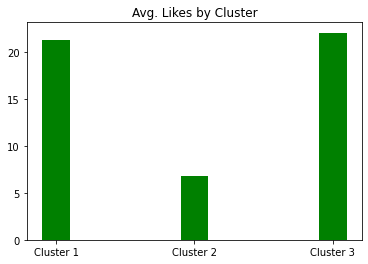

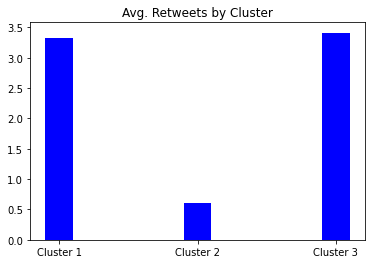

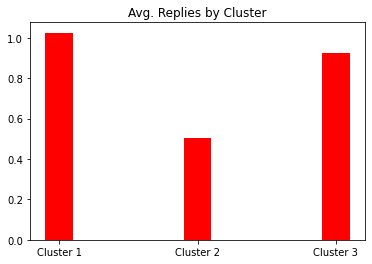

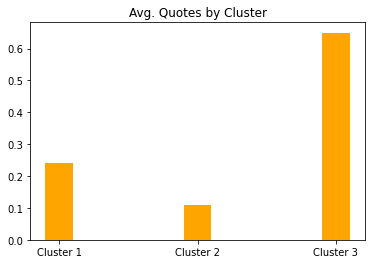

In [22]:
x=np.unique(twitter_df['label_K3'])
likes=[]
retweets=[]
replies=[]
quotes=[]
for i in range(len(np.unique(twitter_df['label_K3']))):
    cond1=twitter_df["label_K3"]==i
    likes.append(np.mean(twitter_df[cond1]['like_count']))
    retweets.append(np.mean(twitter_df[cond1]['retweet_count']))
    replies.append(np.mean(twitter_df[cond1]['reply_count']))
    quotes.append(np.mean(twitter_df[cond1]['quote_count']))
width=.2
plt.bar(x,likes,width,color='green')
plt.xticks(x, ['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.title('Avg. Likes by Cluster')
plt.show()
plt.bar(x,retweets,width,color='blue')
plt.xticks(x, ['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.title('Avg. Retweets by Cluster')
plt.show()
plt.bar(x,replies,width,color='red')
plt.xticks(x, ['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.title('Avg. Replies by Cluster')
plt.show()
plt.bar(x,quotes,width,color='orange')
plt.xticks(x, ['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.title('Avg. Quotes by Cluster')
plt.show()

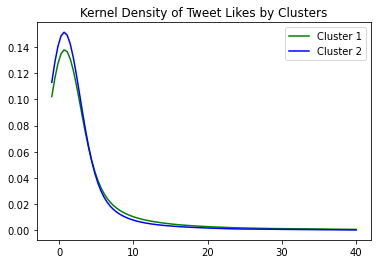

In [7]:
from sklearn.neighbors import KernelDensity
c1=twitter_df["label_K3"]==0
c2=twitter_df["label_K3"]==1
c3=twitter_df["label_K3"]==2
gkde=KernelDensity(kernel='gaussian',bandwidth=2).fit(np.ravel(twitter_df[c1]['like_count']).reshape(-1,1))
x=np.linspace(-1,40,100).reshape(-1,1)
reshape_gkde=np.exp(gkde.score_samples(x))
plt.plot(x, reshape_gkde,'g',label='Cluster 1')
gkde=KernelDensity(kernel='gaussian',bandwidth=2).fit(np.ravel(twitter_df[c2]['like_count']).reshape(-1,1))
x=np.linspace(-1,40,100).reshape(-1,1)
reshape_gkde=np.exp(gkde.score_samples(x))
plt.plot(x, reshape_gkde,'b',label='Cluster 2')
gkde=KernelDensity(kernel='gaussian',bandwidth=2).fit(np.ravel(twitter_df[c3]['like_count']).reshape(-1,1))
x=np.linspace(-1,40,100).reshape(-1,1)
reshape_gkde=np.exp(gkde.score_samples(x))
plt.plot(x, reshape_gkde,'r',label='Cluster 3')
plt.legend()
plt.title("Kernel Density of Tweet Likes by Clusters")
plt.show()

In [17]:
pd.set_option('display.max_colwidth', None)
twitter_df[c3].sort_values(["like_count"],ascending=False).head(5)

,author_id,id,retweet_count,reply_count,like_count,quote_count,text,source,referenced_tweets,created_at,...,user_url,user_username,user_verified,user_withheld,gender,age,org,Bert_cluster_kmeans,label_K3,label_AA5
154169,335401623,1274397047999746049,14023,2335,328307,2021,first ftm haircut -&gt; 4 years of testosterone https://t.co/Zl80sfhZtP,Twitter for iPhone,NaN,2020-06-20 17:41:48+00:00,...,https://t.co/zFhITNBpx3,backtrvck,False,None,male,<=18,non-org,5,2,3
111922,21316749,1316421054173245443,28238,353,138639,1046,Cafe Con Libros — a Black owned feminist bookstore in Crown Heights — did not come to play with #PrimeDay https://t.co/KGH2GT0FlG,Twitter for iPhone,NaN,2020-10-14 16:50:11+00:00,...,,peoplepersson,False,None,female,30-39,non-org,2,2,3
84526,260848464,1349898879655931904,17439,975,70674,9511,"I believe in gender equality, so with that being said.. #bussitchallange https://t.co/RXsL49IzTt",Twitter for iPhone,NaN,2021-01-15 01:59:07+00:00,...,https://t.co/LkdROHUsaj,CHiCAGOsREALiST,False,None,male,<=18,non-org,5,2,3
64759,264797445,1376320547269832707,5920,37,36471,209,The divine feminine https://t.co/PUqkpVYXyo,Twitter for iPhone,NaN,2021-03-28 23:49:23+00:00,...,https://t.co/Suo46qKSO2,cameramanjake,False,None,male,>=40,non-org,5,2,3
93578,587750405,1337044471893078016,5939,134,20653,421,"“[@bts_bighit] have been open about their own challenge with mental health and spoken publicly about their support of LGBTQ+ rights. And they’ve modeled a form of gentle, more neutral masculinity...” https://t.co/LJvpRrgcX4 #bts #kpop",Twitter for iPhone,NaN,2020-12-10 14:40:17+00:00,...,https://t.co/qtZrgN4Exf,kennethcolereal,True,None,male,>=40,non-org,6,2,3


In [22]:
aa1=twitter_df["label_AA5"]==0
aa2=twitter_df["label_AA5"]==1
aa3=twitter_df["label_AA5"]==2
aa4=twitter_df["label_AA5"]==3
aa5=twitter_df["label_AA5"]==4

pd.set_option('display.max_colwidth', None)
twitter_df[aa5].sort_values(["like_count"],ascending=False).head(5)

,author_id,id,retweet_count,reply_count,like_count,quote_count,text,source,referenced_tweets,created_at,...,user_url,user_username,user_verified,user_withheld,gender,age,org,Bert_cluster_kmeans,label_K3,label_AA5
163734,2536561231,1264639006194774027,3490,134,84136,351,thinking about the guy who when I asked him to call me a slut in bed was like “no sorry I’m a feminist”,Twitter for iPhone,NaN,2020-05-24 19:26:49+00:00,...,https://t.co/qun8XBWCYE,abbygov,True,None,female,19-29,non-org,3,0,4
133421,1276360928586539008,1294545588881698816,1327,24,23170,24,@sexyebonyteen You’re lucky we say anything. Just trying not to be murdered cause y’all masculinity so fragile that you can’t take rejection,Twitter for iPhone,[<ReferencedTweet id=1294542721554755590 type=replied_to],2020-08-15 08:04:54+00:00,...,,theonlykeren,False,None,male,<=18,non-org,3,1,4
129339,165830133,1298540868710707202,81,48,8936,4,can you guys please stop using this as an excuse to be sexist it is literally not that big of a deal,Twitter for iPhone,[<ReferencedTweet id=1298372505552318464 type=replied_to],2020-08-26 08:40:43+00:00,...,https://t.co/gvL8sWxMp2,hunter_hhhh,False,None,male,<=18,non-org,1,0,4
2926,1204426161847181312,1472312281291796482,1220,47,6473,161,"Doja Cat is a rapper. 80% of her music is rap. &amp; her bars be eating these dudes up. Drake sings on damn near all his songs but no one questions whether or not he’s a rapper, they just say he’s versatile. It’s giving misogyny for people questioning if she’s a rapper or not.",Twitter for iPhone,NaN,2021-12-18 21:06:16+00:00,...,https://t.co/jkViVu99rz,FatBlackLuxury,False,None,female,30-39,non-org,3,0,4
22282,132928314,1449887848874848264,173,36,6345,22,"@JosephWMead My mom was a feminist but loved doing laundry &amp; I never understood why until one day I went in search of her &amp; found her drinking scotch, smoking a cigarette &amp; listening to her favorite radio program next to the dryer. “What?” She croaked at me. “I’m doing laundry.”",Twitter for iPhone,[<ReferencedTweet id=1449730147968503808 type=replied_to],2021-10-17 23:59:35+00:00,...,,lizlovesmusic,False,None,female,19-29,non-org,3,0,4


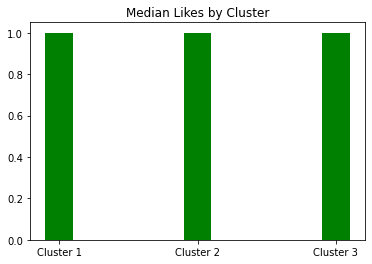

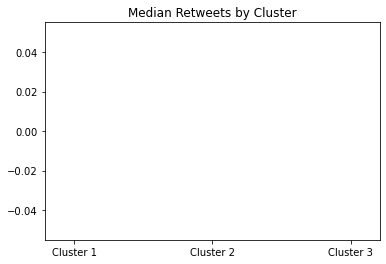

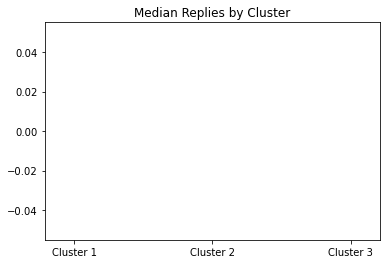

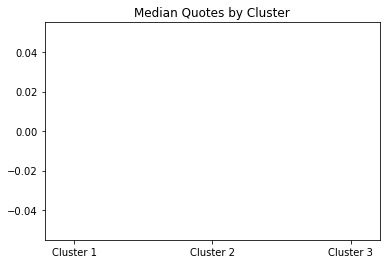

In [24]:
x=np.unique(twitter_df['label_K3'])
likes=[]
retweets=[]
replies=[]
quotes=[]
for i in range(len(np.unique(twitter_df['label_K3']))):
    cond1=twitter_df["label_K3"]==i
    likes.append(np.median(twitter_df[cond1]['like_count']))
    retweets.append(np.median(twitter_df[cond1]['retweet_count']))
    replies.append(np.median(twitter_df[cond1]['reply_count']))
    quotes.append(np.median(twitter_df[cond1]['quote_count']))
width=.2
plt.bar(x,likes,width,color='green')
plt.xticks(x, ['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.title('Median Likes by Cluster')
plt.show()
plt.bar(x,retweets,width,color='blue')
plt.xticks(x, ['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.title('Median Retweets by Cluster')
plt.show()
plt.bar(x,replies,width,color='red')
plt.xticks(x, ['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.title('Median Replies by Cluster')
plt.show()
plt.bar(x,quotes,width,color='orange')
plt.xticks(x, ['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.title('Median Quotes by Cluster')
plt.show()

In [4]:
from sklearn import decomposition
embeddings=twitter_df.Bert_embedding.values.tolist()
pca = decomposition.PCA(n_components=30)
pca.fit(embeddings)
pca1 = pca.transform(embeddings)
np.sum(pca.explained_variance_ratio_)

0.5807591896919526

In [5]:
pca1
pca=pd.DataFrame(pca1)
pca

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.684614,-1.484491,0.117534,-0.451039,1.003641,0.301813,0.147737,0.018961,-0.678665,0.117689,...,0.319238,-0.187898,0.104842,-0.098071,-0.041134,0.023494,-0.044288,-0.116641,-0.055374,-0.047321
1,1.710035,0.582615,-0.491383,0.229379,0.310512,-0.584502,0.963478,0.408356,-0.273325,0.123326,...,-0.171471,0.121791,-0.012651,0.048153,0.228292,-0.077180,0.149345,-0.009935,-0.511163,-0.281317
2,-0.274294,0.077528,-0.854421,0.254124,-0.572536,0.269350,0.244813,0.279022,-0.035807,0.413181,...,0.533911,-0.015374,-0.518844,-0.240165,-0.213317,-0.481392,0.168935,-0.561533,-0.105920,0.182569
3,-2.195476,0.654376,1.636446,-0.221532,0.903387,-0.609413,1.101489,0.147612,0.648542,-0.700471,...,0.569722,0.036705,-0.215327,-0.045905,-0.383290,0.172686,-0.677191,-0.503074,0.052940,0.084821
4,-1.358710,0.816828,0.432912,0.141378,1.215584,-0.568947,0.182014,-0.113161,0.384596,0.003959,...,-0.273590,-0.245715,0.153423,0.691005,-0.263459,0.300613,-0.180926,0.882177,-0.197000,0.457329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182309,-1.355885,0.397664,0.010336,0.161309,0.380986,0.762668,-0.073745,-0.522166,0.524032,-0.312266,...,0.372929,0.362964,0.365367,0.615760,0.621135,-0.504668,0.675303,-0.145429,-0.347158,-0.252920
182310,0.066236,1.960345,-0.663199,-0.000499,0.448365,-1.410094,-0.307748,0.205584,0.022769,0.087037,...,-0.225760,0.185023,0.016078,0.230488,0.150748,0.032373,-0.330735,0.012945,-0.014125,-0.062135
182311,-0.510745,2.326380,-0.425011,-0.182778,-0.700547,-0.595430,0.431904,0.885115,0.179499,0.527202,...,-0.047448,-0.089336,0.116567,-0.167527,-0.504146,0.365395,-0.278826,-0.096573,0.342529,0.013003
182312,0.689565,-0.007994,0.199706,-0.132460,0.193694,0.302223,0.177855,-0.413326,-0.352084,-0.341501,...,-0.207130,-0.015195,-0.012912,0.002816,0.193469,0.833111,0.062881,0.204865,-0.063929,0.638613


In [6]:
sub=pca.sample(n=20000)
sub

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
45482,-1.026049,-0.269877,-0.939523,-0.931578,-0.254951,0.041256,0.046154,0.131526,-0.237242,-0.007515,...,0.003034,0.032968,-0.162039,0.801080,0.252934,-0.680231,-0.081170,0.069285,0.137859,0.077906
119511,-1.386422,-2.136276,-0.189477,0.857508,-0.382656,0.271984,0.617459,0.487630,0.089930,0.047944,...,-0.230960,-0.192906,-0.081876,-0.053913,-0.309913,-0.215224,-0.348071,-0.330288,0.473827,-0.009321
173065,2.204204,0.776522,1.017886,0.106543,-0.030045,0.255368,-0.332163,0.173018,-0.316259,-0.318127,...,0.439953,0.428313,0.231594,0.185453,-0.075877,0.164996,-0.619156,0.199463,0.002292,-0.120674
10379,0.737590,-0.925350,-0.273441,-0.761848,0.583187,0.495383,0.778767,-0.109186,0.041687,-0.405926,...,0.241733,0.327223,0.013340,0.551452,-0.275445,-0.362584,-0.096133,-0.010910,-0.054819,-0.433803
133766,0.872219,-0.473847,0.412182,-1.482755,0.627364,-0.019292,0.208686,-0.042937,-0.258661,0.509071,...,-0.066917,-0.163637,0.253606,-0.472484,0.121027,0.457925,-0.379806,0.264362,-0.044457,0.044840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139890,0.550786,-0.494266,-0.174527,1.117537,-0.183699,0.538013,-0.203262,0.051093,0.516601,-0.273622,...,-0.303221,-0.096691,0.155696,-0.406018,-0.173088,-0.276797,-0.069976,0.364325,-0.363556,0.086767
68532,0.962438,-1.586795,0.178207,0.705770,0.168275,-0.358301,0.414700,-0.494793,0.297935,-0.619881,...,0.070571,0.148755,-0.214327,-0.368921,-0.428478,-0.046359,-0.013071,0.093091,-0.065734,0.136497
127218,1.698515,0.157997,1.091249,-0.405499,0.604270,0.403071,0.321691,0.011620,-0.220423,-0.116012,...,-0.196216,-0.042774,0.181193,0.091005,0.306418,-0.073715,0.284562,-0.539717,-0.046130,-0.080520
46582,2.353696,0.094418,1.552791,0.609671,-0.216096,0.006387,-0.214158,-0.250829,0.492559,-0.415610,...,0.222275,-0.019949,0.091653,0.271710,0.417508,-0.202212,0.163669,-0.489258,0.263716,0.229556


In [47]:
from py_pcha import PCHA

XC, S, C, SSE, varexpl = PCHA(np.array(pca.T), noc=3, delta=0.1)

just completed 2
just completed 3
just completed 4
just completed 5
just completed 6
just completed 7
just completed 8
just completed 9
just completed 10
just completed 11
just completed 12
just completed 13
just completed 14
just completed 15
just completed 16
just completed 17
just completed 18
just completed 19
just completed 20
just completed 21
just completed 22
just completed 23
just completed 24


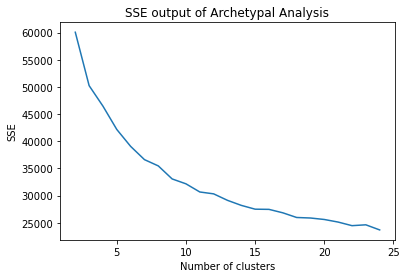

In [15]:
from py_pcha import PCHA

SSE_output=[]
for i in range(2,25):
    sub=pca.sample(n=10000)
    XC, S, C, SSE, varexpl = PCHA(np.array(sub.T), noc=i, delta=0, maxiter=100)
    SSE_output.append(SSE)
    print(f"just completed {i}")

x=[]
for i in range(2,25):
        x.append(i)
plt.plot(x,SSE_output)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('SSE output of Archetypal Analysis')
plt.show()

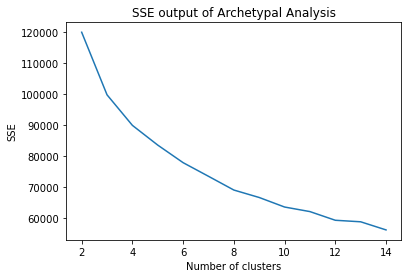

In [14]:
x=[]
for i in range(2,15):
        x.append(i)
plt.plot(x,SSE_output)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('SSE output of Archetypal Analysis')
plt.show()

In [6]:
XC, S, C, SSE, varexpl = PCHA(np.array(pca.T), noc=5, delta=0, maxiter=500)

In [19]:
print(np.shape(S))
print(np.shape(C))
print(S[0,0]+S[1,0]+S[2,0]+S[3,0]+S[4,0])
list=[S[0,0],S[1,0],S[2,0],S[3,0],S[4,0]]
m=max(list)
list.index(m)+1

(5, 182314)
(182314, 5)
1.0


1

In [25]:
res_AA=[]
for i in range(len(pca)):
    list=[S[0,i],S[1,i],S[2,i],S[3,i],S[4,i]]
    m=max(list)
    res_AA.append(list.index(m))

In [26]:
twitter_df['label_AA5']=res_AA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
twitter_df = pd.read_pickle(r"C:\Users\stokg\OneDrive\Jupyter Notebooks\twitter_4_24_9_noBERT.pkl")
twitter_df.columns

Index(['author_id', 'id', 'retweet_count', 'reply_count', 'like_count',
       'quote_count', 'text', 'source', 'referenced_tweets', 'created_at',
       'lang', 'place_id', 'cleaned text', 'tokens', 'place_name',
       'user_created_at', 'user_description', 'user_entities', 'user_id',
       'user_location', 'user_name', 'user_pinned_tweet_id',
       'user_profile_image_url', 'user_protected', 'user_followers_count',
       'user_following_count', 'user_tweet_count', 'user_listed_count',
       'user_url', 'user_username', 'user_verified', 'user_withheld', 'gender',
       'age', 'org', 'Bert_cluster_kmeans', 'label_K3', 'label_AA5'],
      dtype='object')

In [8]:
twitter_df['tokens']

0         ['even', 'sit', 'silver', 'lake', 'coffee', 's...
1         ['still', 'lobbying', 'barbie', 'nutcracker', ...
2         ['look', 'gop', 'legislators', 'asked', 'quest...
3              ['thank', 'god', 'masculine', 'man', 'love']
4         ['wait', 'minute', 'testosterone', 'stallion',...
                                ...                        
182513    ['masculine', 'feminine', 'energies', 'would',...
182514                ['funny', 'degenerate', 'misogynist']
182515                      ['dumbass', 'feminist', 'icon']
182516    ['dominate', 'psychology', 'power', 'posing', ...
182517    ['life', 'interesting', 'knows', 'send', 'adds...
Name: tokens, Length: 182314, dtype: object

In [2]:
for i in range(len(np.unique(twitter_df['label_AA5']))):
    cond1=twitter_df["label_AA5"]==i
    a1=twitter_df["age"]=='>=40'
    a2=twitter_df["age"]=='30-39'
    a3=twitter_df["age"]=='19-29'
    a4=twitter_df["age"]=='<=18'
    a5=twitter_df["age"].isnull()
    g1=twitter_df["gender"]=='male'
    g2=twitter_df["gender"]=='female'
    g3=twitter_df["gender"].isnull()
    o1=twitter_df["org"]=='non-org'
    o2=twitter_df["org"]=='is-org'
    o3=twitter_df["org"].isnull()
    print(f"% of Tweets in cluster {i+1}: {round(len(twitter_df[cond1])/len(twitter_df),2)}")
    print(f"Age information for cluster {i+1}")
    print(f"% Age 40+: {round(len(twitter_df[cond1&a1])/len(twitter_df[cond1]),2)}")
    print(f"% Age 30-39: {round(len(twitter_df[cond1&a2])/len(twitter_df[cond1]),2)}")
    print(f"% Age 19-29: {round(len(twitter_df[cond1&a3])/len(twitter_df[cond1]),2)}")
    print(f"% Age <=18: {round(len(twitter_df[cond1&a4])/len(twitter_df[cond1]),2)}")
    print(f"% Age unknown: {round(len(twitter_df[cond1&a5])/len(twitter_df[cond1]),2)}")
    print(f"Gender information for cluster {i+1}")
    print(f"% Male: {round(len(twitter_df[cond1&g1])/len(twitter_df[cond1]),2)}")
    print(f"% Female: {round(len(twitter_df[cond1&g2])/len(twitter_df[cond1]),2)}")
    print(f"% Unknown: {round(len(twitter_df[cond1&g3])/len(twitter_df[cond1]),2)}")
    print(f"Org. information for cluster {i+1}")
    print(f"% Org: {round(len(twitter_df[cond1&o2])/len(twitter_df[cond1]),2)}")
    print(f"% Not Org: {round(len(twitter_df[cond1&o1])/len(twitter_df[cond1]),2)}")
    print(f"% Unknown: {round(len(twitter_df[cond1&o3])/len(twitter_df[cond1]),2)}")
    print("------------------")
    

% of Tweets in cluster 1: 0.32
Age information for cluster 1
% Age 40+: 0.33
% Age 30-39: 0.19
% Age 19-29: 0.28
% Age <=18: 0.09
% Age unknown: 0.11
Gender information for cluster 1
% Male: 0.5
% Female: 0.39
% Unknown: 0.11
Org. information for cluster 1
% Org: 0.02
% Not Org: 0.87
% Unknown: 0.11
------------------
% of Tweets in cluster 2: 0.07
Age information for cluster 2
% Age 40+: 0.13
% Age 30-39: 0.09
% Age 19-29: 0.4
% Age <=18: 0.23
% Age unknown: 0.15
Gender information for cluster 2
% Male: 0.43
% Female: 0.42
% Unknown: 0.15
Org. information for cluster 2
% Org: 0.01
% Not Org: 0.84
% Unknown: 0.15
------------------
% of Tweets in cluster 3: 0.21
Age information for cluster 3
% Age 40+: 0.37
% Age 30-39: 0.19
% Age 19-29: 0.23
% Age <=18: 0.09
% Age unknown: 0.12
Gender information for cluster 3
% Male: 0.51
% Female: 0.37
% Unknown: 0.12
Org. information for cluster 3
% Org: 0.03
% Not Org: 0.84
% Unknown: 0.12
------------------
% of Tweets in cluster 4: 0.23
Age info

In [33]:
twitter_df.to_pickle("twitter_4_24_9.pkl")

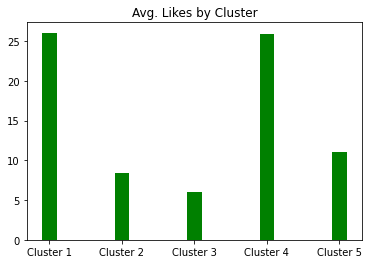

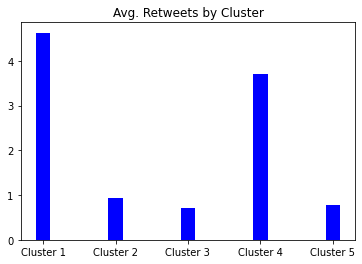

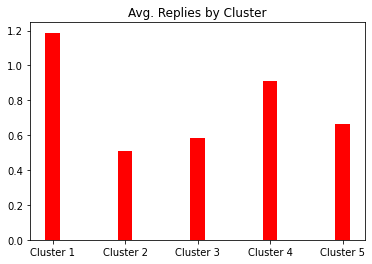

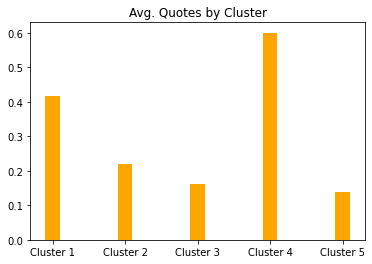

In [29]:
x=np.unique(twitter_df['label_AA5'])
likes=[]
retweets=[]
replies=[]
quotes=[]
for i in range(len(np.unique(twitter_df['label_AA5']))):
    cond1=twitter_df["label_AA5"]==i
    likes.append(np.mean(twitter_df[cond1]['like_count']))
    retweets.append(np.mean(twitter_df[cond1]['retweet_count']))
    replies.append(np.mean(twitter_df[cond1]['reply_count']))
    quotes.append(np.mean(twitter_df[cond1]['quote_count']))
width=.2
plt.bar(x,likes,width,color='green')
plt.xticks(x, ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'])
plt.title('Avg. Likes by Cluster')
plt.show()
plt.bar(x,retweets,width,color='blue')
plt.xticks(x, ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'])
plt.title('Avg. Retweets by Cluster')
plt.show()
plt.bar(x,replies,width,color='red')
plt.xticks(x, ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'])
plt.title('Avg. Replies by Cluster')
plt.show()
plt.bar(x,quotes,width,color='orange')
plt.xticks(x, ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'])
plt.title('Avg. Quotes by Cluster')
plt.show()

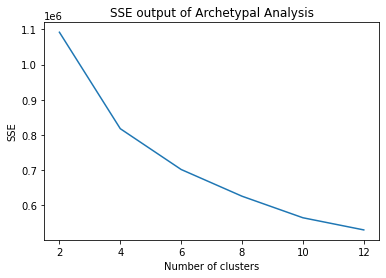

In [5]:
x=[2,4,6,8,10,12]
plt.plot(x,SSE_output)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('SSE output of Archetypal Analysis')
plt.show()

In [2]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
from collections import Counter

twitter_df = pd.read_pickle(r"C:\Users\stokg\OneDrive\Jupyter Notebooks\twitter_4_24_9.pkl")
##Word Clouds
cluster_word_cloud = []
word_freqs = []
most_freq_30_words = []
for cluster in range(np.unique(twitter_df['label_AA5'])):
    all_words = []
    for line in twitter_df[twitter_df['label_AA5']==cluster]['tokens']: # try ‘tokens’
        all_words.extend(line)
    wordfreq = Counter(all_words)
    word_freqs.append(wordfreq)
    most_freq_30_words.extend([pair[0] for pair in wordfreq.most_common(30)])
wordcloud = WordCloud(width=900,
                height=500,
                max_words=25,
                max_font_size=100,
                relative_scaling=0.5,
                colormap='hot',
                normalize_plurals=True).generate_from_frequencies(wordfreq)
cluster_word_cloud.append(wordcloud)
plt.figure(figsize=(5,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

In [31]:
pip install wordcloud

  Running setup.py clean for wordcloud
Failed to build wordcloud
    Running setup.py install for wordcloud: started
    Running setup.py install for wordcloud: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\stokg\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\stokg\\AppData\\Local\\Temp\\pip-install-tnil26ly\\wordcloud_2646453e1c7d4f36b439c985e913bbbb\\setup.py'"'"'; __file__='"'"'C:\\Users\\stokg\\AppData\\Local\\Temp\\pip-install-tnil26ly\\wordcloud_2646453e1c7d4f36b439c985e913bbbb\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\stokg\AppData\Local\Temp\pip-wheel-jnvhjh6p'
       cwd: C:\Users\stokg\AppData\Local\Temp\pip-install-tnil26ly\wordcloud_2646453e1c7d4f36b439c985e913bbbb\
  Complete output (20 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.9

In [4]:
twitter_df = pd.read_pickle(r"C:\Users\stokg\OneDrive\Jupyter Notebooks\twitter_4_24_9.pkl")
del twitter_df["Bert_embedding"]

twitter_df.columns
twitter_df.to_pickle("twitter_4_24_9_noBERT.pkl")